In [97]:
def mean_squared_error(pred, true):
    total_squared_error = sum((pred - true)**2)
    return total_squared_error / len(pred)

In [98]:
def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

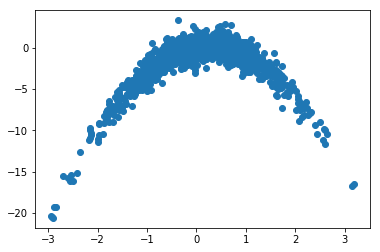

[[ -3.09517638e-02]
 [ -1.25882903e-02]
 [ -2.13414180e-02]
 [ -2.40412642e-02]
 [ -2.61570539e-02]
 [ -2.98283278e-02]
 [ -4.02163301e-02]
 [ -3.55656201e-02]
 [ -2.84202342e-03]
 [ -7.37997536e-03]
 [ -1.89373951e-02]
 [ -1.14371170e-02]
 [ -3.54501993e-02]
 [ -1.22918527e-02]
 [ -2.01803706e-02]
 [ -8.24310923e-03]
 [ -1.72430532e-02]
 [ -5.14795584e-03]
 [  5.03050081e-03]
 [ -1.48474809e-02]
 [ -3.48523664e-02]
 [ -2.65563101e-02]
 [ -9.40475831e-03]
 [ -2.07122655e-02]
 [ -3.20097295e-02]
 [ -3.19641939e-03]
 [ -1.85425638e-02]
 [ -4.22796685e-03]
 [ -1.14206759e-02]
 [ -1.92220143e-02]
 [ -2.23485377e-02]
 [ -2.75169561e-02]
 [ -6.80300227e-03]
 [  5.97512276e-03]
 [ -5.36021072e-03]
 [ -1.11278074e-02]
 [ -1.28239327e-02]
 [ -2.54266697e-02]
 [  9.56496490e-03]
 [ -3.23417029e-02]
 [ -6.99200402e-03]
 [ -7.36232440e-03]
 [ -1.70060929e-02]
 [ -2.58929322e-02]
 [ -8.22027891e-03]
 [ -1.07895118e-02]
 [ -2.17444862e-02]
 [ -2.18131650e-02]
 [ -1.28487874e-02]
 [ -2.43309520e-02]


ValueError: Found input variables with inconsistent numbers of samples: [999, 1000]

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

''' Part a '''
y = np.random.normal(size=1000)
x = np.random.normal(size=1000)
y = x - 2*x**2 + np.random.normal(size=1000)

''' Part b '''
plt.scatter(x, y)
plt.show()

''' Part c '''
np.random.seed(42)
xy_frame = pd.DataFrame(np.asmatrix((x, y)).reshape(1000, 2), columns=['X', 'Y'])
true_labels = poly(np.asmatrix(xy_frame.drop('Y', axis=1)).transpose(), 1)
print true_labels

# Compute LOOCV errors
loo = LeaveOneOut()
model = LinearRegression()
error = 0
for train_index, test_index in loo.split(xy_frame['X']):
    train = xy_frame.drop(test_index, axis=0)
    model.fit(train.drop('Y', axis=1), true_labels)
    #print xy_frame.iloc[test_index].drop('Y', axis=1)
    #print model.predict(xy_frame.iloc[test_index].drop('Y', axis=1))
    #print float(xy_frame.iloc[test_index].drop('X', axis=1).iloc[0])
    error += mean_squared_error(model.predict(xy_frame.iloc[test_index].drop('Y', axis=1)), true_labels)    
print float(error) / len(xy_frame)

''' Part d '''